# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [93]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:
# Read your api key environment variable
load_dotenv('sp.env')
api_key=os.getenv("news_api")


In [95]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)

In [96]:
# Fetch the Bitcoin news articles
bitcoin_articles=newsapi.get_everything(q='Bitcoin',language='en')
bitcoin_articles['totalResults'] # total number of articles

10319

In [97]:
bitcoin_articles['articles'][19]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters Staff',
 'title': 'Bitcoin hits record high of $62,575 - Reuters.com',
 'description': 'Bitcoin hit a record of $62,575 on Tuesday, extending its 2021 rally to new heights.',
 'url': 'https://www.reuters.com/article/us-crypto-currency-idUSKBN2C00W9',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20210413&t=2&i=1558248776&r=LYNXMPEH3C0FC&w=800',
 'publishedAt': '2021-04-13T08:41:00Z',
 'content': 'By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken March 15, 2021. REUTERS/Dado Ruvic/Illustration/File Photo\r\nLON… [+449 chars]'}

In [98]:
# Fetch the Ethereum news articles
eth_articles=newsapi.get_everything(q='Ethereum',language='en')
eth_articles['totalResults'] # total number of articles

4027

In [99]:
eth_articles['articles'][19]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters',
 'title': "Sotheby's to accept bitcoin, ethereum for Banksy auction - Reuters",
 'description': 'Sotheby\'s said on Tuesday it would accept bitcoin and ethereum as payment for Banksy\'s iconic artwork "Love is in the Air", a first for a physical art auction and the latest sign of growing mainstream acceptance of cryptocurrencies.',
 'url': 'https://www.reuters.com/lifestyle/sothebys-accept-bitcoin-ethereum-banksy-auction-2021-05-04/',
 'urlToImage': 'https://www.reuters.com/resizer/aSE7E8Q5aehUzsAOPv3SZ5SOdyI=/1200x628/smart/cloudfront-us-east-2.images.arcpublishing.com/reuters/27XBX3SRVZMRLBYLCPCUHPOZCA.jpg',
 'publishedAt': '2021-05-04T13:46:00Z',
 'content': 'Sotheby\'s said on Tuesday it would accept bitcoin and ethereum as payment for Banksy\'s iconic artwork "Love is in the Air", a first for a physical art auction and the latest sign of growing mainstrea… [+1176 chars]'}

In [100]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df=pd.DataFrame.from_dict(bitcoin_articles['articles'])

In [101]:
bitcoin_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Alex Wilhelm,Shares of Square are up more than 6% today aft...,Today we're talking Square earnings and its bi...,2021-05-07T18:17:36Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",What Square’s smashing earnings tell us about ...,http://techcrunch.com/2021/05/07/what-squares-...,https://techcrunch.com/wp-content/uploads/2020...
1,Rebecca Bellan,Tesla’s relationship with bitcoin is not a dal...,Tesla’s relationship with bitcoin is not a dal...,2021-04-27T01:36:46Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Tesla sees bitcoin as important financial tool...,http://techcrunch.com/2021/04/26/tesla-sees-bi...,https://techcrunch.com/wp-content/uploads/2021...
2,Mike Winters,Cryptocurrency continues to gain mainstream ac...,Cryptocurrency continues to gain mainstream ac...,2021-04-20T19:00:00Z,"{'id': None, 'name': 'Lifehacker.com'}","You Can Now Exchange Crypto on Venmo, If You'r...",https://twocents.lifehacker.com/you-can-now-ex...,https://i.kinja-img.com/gawker-media/image/upl...
3,Lucas Matney,Cryptocurrency prices continued to tumble Frid...,Cryptocurrency prices continued to tumble Frid...,2021-04-23T17:58:10Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Crypto market takes a dive with Bitcoin leadin...,http://techcrunch.com/2021/04/23/crypto-market...,https://techcrunch.com/wp-content/uploads/2020...
4,Tage Kene-Okafor,The crypto industry as a whole has seen a mome...,The crypto industry as a whole has seen a mome...,2021-04-13T08:30:21Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",African crypto usage spurs Luno as customers r...,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...


In [102]:
bitcoin_df.shape

(20, 8)

In [103]:
bitcoin_sentiments=[]

for article in bitcoin_articles['articles']:
    try:
        text=article['content']
        date=article['publishedAt'][:10]
        sentinment=analyzer.polarity_scores(text)
        compound=sentinment['compound']
        pos = sentinment['pos']
        neu =sentinment['neu']
        neg = sentinment['neg']

        bitcoin_sentiments.append({
            'text':text,
            'date':date,
            'compound':compound,
            'pos':pos,
            'neu': neu,
            'neg':neg

        })
    except AttributeError:
        pass
bitcoin_sentiments=pd.DataFrame(bitcoin_sentiments,columns=['date','text','compound','pos','neu','neg'])

In [104]:
bitcoin_sentiments.head()

,date,text,compound,pos,neu,neg
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.0
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.0
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.0
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,1.000,0.0
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.0


In [105]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment=[]
for article in eth_articles['articles']:
    try:
        date=article['publishedAt']
        text=article['content']
        sentinment=analyzer.polarity_scores(text)
        compound=sentinment['compound']
        positive=sentinment['pos']
        neutral=sentinment['neu']
        negative=sentinment['neg']

        eth_sentiment.append({

            'date':date,
            'text':text,
            'compound':compound,
            'neutral':neutral,
            'positive': positive,
            'negative':negative,
            
        })
    except AttributeError:
        pass

eth_sentiment=pd.DataFrame(eth_sentiment,columns=['date','text','compound','neutral','positive','negative'])

In [106]:
eth_sentiment.head()

,date,text,compound,neutral,positive,negative
0,2021-05-04T14:30:39Z,Their investors call them disruptive innovator...,-0.2144,0.835,0.054,0.111
1,2021-04-20T19:00:00Z,Cryptocurrency continues to gain mainstream ac...,0.7506,0.829,0.171,0.000
2,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.966,0.034,0.000
3,2021-05-01T17:24:45Z,New York (CNN Business)Bitcoin prices continue...,0.0000,1.000,0.000,0.000
4,2021-05-03T18:08:48Z,"The creators behind CryptoPunks, one of the mo...",0.4754,0.909,0.091,0.000


In [107]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.mean()

compound    0.22196
pos         0.06185
neu         0.92790
neg         0.01030
dtype: float64

In [108]:
# Describe the Ethereum Sentiment
eth_sentiment.mean()

compound    0.13239
neutral     0.94800
positive    0.04275
negative    0.00925
dtype: float64

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest positive mean score of 0.06185

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound mean score of 0.22196

Q. Which coin had the highest neutral score?

A: Ethereum has the highest neutral score of 0.9480

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [135]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [140]:
# bitcoin_sentiments.text
print(eth_sentiment.text)

0     Their investors call them disruptive innovator...
1     Cryptocurrency continues to gain mainstream ac...
2     Venmo is jumping aboard the cryptocurrency ban...
3     New York (CNN Business)Bitcoin prices continue...
4     The creators behind CryptoPunks, one of the mo...
5     ConsenSys, a key player in crypto and a major ...
6     By Reuters Staff\r\nFILE PHOTO: A representati...
7     A representation of virtual currency Ethereum ...
8     It took a while to get here, but Dfinity is fi...
9     Its been a big year for crypto, and Robinhood ...
10    This story originally appeared on StockMarketU...
11    This article was translated from our Spanish e...
12    Non-fungible tokens (NFTs) are quickly becomin...
13    Posted \r\nThe S&amp;P Dow Jones Indices launc...
14    A representation of virtual currency Ethereum ...
15    By Reuters Staff\r\nSINGAPORE, May 3 (Reuters)...
16    By Reuters Staff\r\n(Adds detail of reported E...
17    By Reuters Staff\r\nFILE PHOTO: A represen

In [300]:
# Instantiate the lemmatizer
lmt=WordNetLemmatizer()

# Create a list of stopwords
sw=set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon={'Reuters', 'Staff','[',']','char','reuters','said'}



In [220]:
# Complete the tokenizer function
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex=re.compile('[^a-zA-z0-9]')
    re_clean=regex.sub(' ', text)
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem=[lmt.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens=[word.lower() for word in lem if word.lower() not in sw.union (sw_addon)]
    
    # Remove the stop words
    
    
    return tokens

In [221]:
# Create a new tokens column for Bitcoin
tokens=[]
for row in bitcoin_sentiments.text:
    token=tokenizer(row)
    tokens.append(token)


In [222]:
print(tokens[0])

['shares', 'square', '6', 'today', 'american', 'fintech', 'company', 'reported', 'staggering', '5', '06', 'billion', 'revenue', 'q1', '2021', 'earnings', 'report', 'far', 'ahead', 'expected', 'tally', '3', '36', 'bi', '2045']


In [223]:
bitcoin_sentiments['tokens']=tokens
bitcoin_sentiments.head()

,date,text,compound,pos,neu,neg,tokens,bigram
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.0,"[shares, square, 6, today, american, fintech, ...","{('shares', 'square'): 1, ('square', '6'): 1, ..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.0,"[tesla, relationship, bitcoin, dalliance, acco...","{('tesla', 'relationship'): 1, ('relationship'..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.0,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,1.000,0.0,"[cryptocurrency, price, continued, tumble, fri...","{('cryptocurrency', 'price'): 1, ('price', 'co..."
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.0,"[crypto, industry, whole, ha, seen, momentous,...","{('crypto', 'industry'): 1, ('industry', 'whol..."


In [224]:
# Create a new tokens column for Ethereum
tokens=[]
for row in eth_sentiment.text:
    token=tokenizer(row)
    tokens.append(token)

In [225]:
print(tokens[0])

['investor', 'call', 'disruptive', 'innovator', 'detractors', 'like', 'north', 'carolina', 'attorney', 'general', 'josh', 'stein', 'call', 'dirty', 'scammer', 'leda', 'health', 'co', 'founder', 'madison', 'campbell', 'liesel', 'vaidya', 'th', '8679']


In [226]:
eth_sentiment['tokens']=tokens
eth_sentiment.head()

,date,text,compound,neutral,positive,negative,tokens,bigram
0,2021-05-04T14:30:39Z,Their investors call them disruptive innovator...,-0.2144,0.835,0.054,0.111,"[investor, call, disruptive, innovator, detrac...","{('investor', 'call'): 1, ('call', 'disruptive..."
1,2021-04-20T19:00:00Z,Cryptocurrency continues to gain mainstream ac...,0.7506,0.829,0.171,0.000,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
2,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.966,0.034,0.000,"[venmo, jumping, aboard, cryptocurrency, bandw...","{('venmo', 'jumping'): 1, ('jumping', 'aboard'..."
3,2021-05-01T17:24:45Z,New York (CNN Business)Bitcoin prices continue...,0.0000,1.000,0.000,0.000,"[new, york, cnn, business, bitcoin, price, con...","{('new', 'york'): 1, ('york', 'cnn'): 1, ('cnn..."
4,2021-05-03T18:08:48Z,"The creators behind CryptoPunks, one of the mo...",0.4754,0.909,0.091,0.000,"[creator, behind, cryptopunks, one, popular, n...","{('creator', 'behind'): 1, ('behind', 'cryptop..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [227]:
from collections import Counter
from nltk import ngrams

In [228]:
# Generate the Bitcoin N-grams where N=2
bigram_counts=[]
for row in bitcoin_sentiments.tokens:
    bigram_count=Counter(ngrams(row,2))
    bigram_counts.append(bigram_count)
# print(bigram_counts)
bitcoin_sentiments['bigram']=bigram_counts
bitcoin_sentiments.head()

,date,text,compound,pos,neu,neg,tokens,bigram
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.0,"[shares, square, 6, today, american, fintech, ...","{('shares', 'square'): 1, ('square', '6'): 1, ..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.0,"[tesla, relationship, bitcoin, dalliance, acco...","{('tesla', 'relationship'): 1, ('relationship'..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.0,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,1.000,0.0,"[cryptocurrency, price, continued, tumble, fri...","{('cryptocurrency', 'price'): 1, ('price', 'co..."
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.0,"[crypto, industry, whole, ha, seen, momentous,...","{('crypto', 'industry'): 1, ('industry', 'whol..."


In [229]:
# Generate the Ethereum N-grams where N=2
bigram_counts=[]
for row in eth_sentiment.tokens:
    bigram_count=Counter(ngrams(row,2))
    bigram_counts.append(bigram_count)
# print(bigram_counts)
eth_sentiment['bigram']=bigram_counts
eth_sentiment.head()

,date,text,compound,neutral,positive,negative,tokens,bigram
0,2021-05-04T14:30:39Z,Their investors call them disruptive innovator...,-0.2144,0.835,0.054,0.111,"[investor, call, disruptive, innovator, detrac...","{('investor', 'call'): 1, ('call', 'disruptive..."
1,2021-04-20T19:00:00Z,Cryptocurrency continues to gain mainstream ac...,0.7506,0.829,0.171,0.000,"[cryptocurrency, continues, gain, mainstream, ...","{('cryptocurrency', 'continues'): 1, ('continu..."
2,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.966,0.034,0.000,"[venmo, jumping, aboard, cryptocurrency, bandw...","{('venmo', 'jumping'): 1, ('jumping', 'aboard'..."
3,2021-05-01T17:24:45Z,New York (CNN Business)Bitcoin prices continue...,0.0000,1.000,0.000,0.000,"[new, york, cnn, business, bitcoin, price, con...","{('new', 'york'): 1, ('york', 'cnn'): 1, ('cnn..."
4,2021-05-03T18:08:48Z,"The creators behind CryptoPunks, one of the mo...",0.4754,0.909,0.091,0.000,"[creator, behind, cryptopunks, one, popular, n...","{('creator', 'behind'): 1, ('behind', 'cryptop..."


In [237]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string=' '.join(tokens)
    tokenised=tokenizer(big_string)
    return dict(Counter(tokenised).most_common(N))

In [240]:
# Use token_count to get the top 10 words for Bitcoin
tokens=bitcoin_sentiments.text
token_count(tokens,N=25)

{'bitcoin': 16,
 'cryptocurrency': 7,
 'ha': 6,
 'staff': 6,
 'tesla': 5,
 'price': 4,
 'today': 3,
 '2021': 3,
 'coin': 3,
 'monday': 3,
 'instead': 3,
 'cash': 3,
 'venmo': 3,
 'million': 3,
 'crypto': 3,
 'seen': 3,
 'service': 3,
 'new': 3,
 'world': 3,
 'inc': 3,
 'said': 3,
 'energy': 3,
 'april': 3,
 'file': 3,
 'photo': 3}

In [241]:
# Use token_count to get the top 10 words for Ethereum
tokens=eth_sentiment.text
token_count(tokens,N=25)

{'ethereum': 9,
 'cryptocurrency': 6,
 'bitcoin': 6,
 'currency': 6,
 'stock': 6,
 'illustration': 6,
 '000': 4,
 'ha': 4,
 'project': 4,
 'crypto': 4,
 'staff': 4,
 'representation': 4,
 'virtual': 4,
 'seen': 4,
 'front': 4,
 'graph': 4,
 'taken': 4,
 'february': 4,
 '19': 4,
 '2021': 4,
 'dado': 4,
 'ruvic': 4,
 'singapore': 4,
 'ether': 4,
 'monday': 4}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [242]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [294]:
# Generate the Bitcoin word cloud
# big_string=(' '.join(bitcoin_articles[text]))
# # tokenised=tokenizer(big_string)
# wc=WordCloud().generate(big_string)
# plt.imshow(wc)

In [206]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [248]:
import spacy
from spacy import displacy

In [208]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [249]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

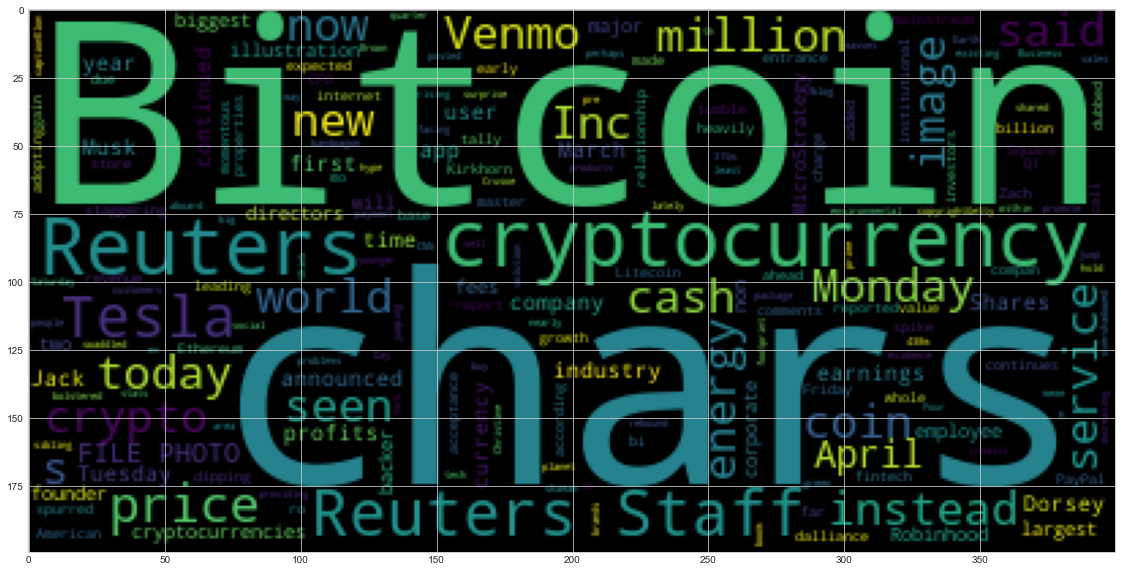

In [292]:
# Concatenate all of the Bitcoin text together
all_bitcoin=[]
for text in bitcoin_sentiments.text:
    all_bitcoin.append(text)
    
all_bitcoin_txt=(' '.join(all_bitcoin))
wc=WordCloud().generate(all_bitcoin_txt)
plt.imshow(wc)

# sentence = ['this','is','a','sentence']
# s=(" ".join(sentence))
# print(s)

In [280]:
print(all_bitcoin_txt)

Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.
Bitcoin is down ro… [+1222 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bi

In [281]:
# Run the NER processor on all of the text
doc=nlp(all_bitcoin_txt)

# Add a title to the document
# doc

Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.
Bitcoin is down ro… [+1222 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bi

In [282]:
# Render the visualization
displacy.render(doc, style='ent')

In [286]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
R

---

### Ethereum NER

In [287]:
# Concatenate all of the Ethereum text together, # Run the NER processor on all of the text
all_eth=[]
for text in eth_sentiment.text:
    all_eth.append(text)
    
all_eth_txt=(' '.join(all_eth))

In [288]:
# Add a title to the document
# YOUR CODE HERE!

In [289]:
# Render the visualization
displacy.render(doc, style='ent')

In [290]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
R

---

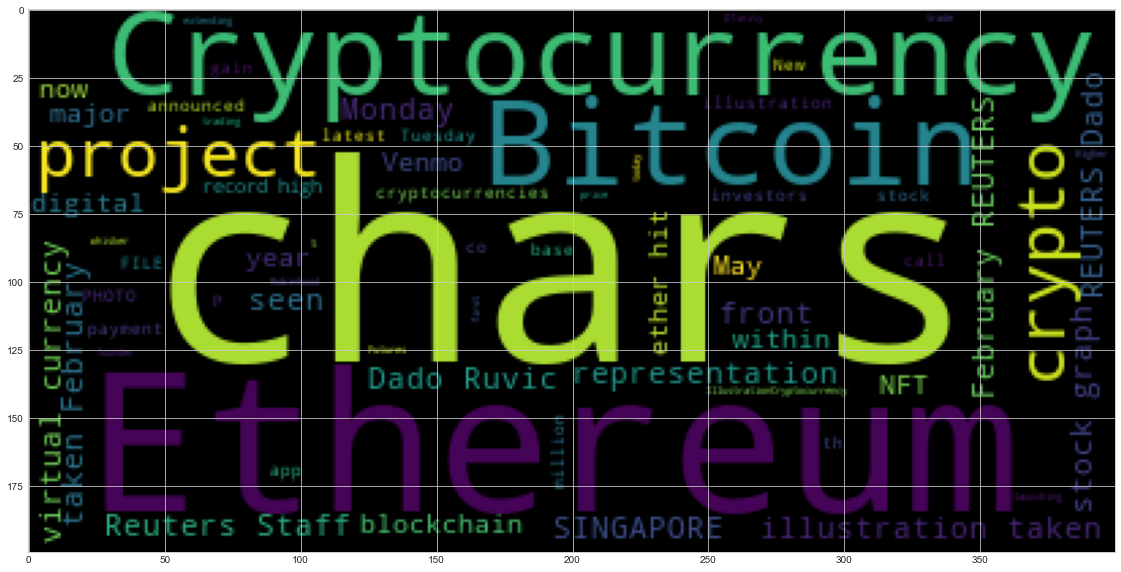

In [298]:
wc=WordCloud().generate(all_eth_txt)
plt.imshow(wc)